In [22]:
#In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

1st Objective - Scatter Plots

In [23]:
#Your first objective is to build a series of scatter plots to showcase the following relationships:

#* Temperature (F) vs. Latitude
#* Humidity (%) vs. Latitude
#* Cloudiness (%) vs. Latitude
#* Wind Speed (mph) vs. Latitude

#After each plot add a sentence or two explaining what the code is and analyzing.

In [24]:
#Import dependencies
from citipy import citipy
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from config import api_key
import random
import decimal
import requests
from time import sleep
from scipy import stats

In [25]:
###########create random list of latitudes and longitude - REPLACE 5 WITH 500 LATER ON
latitudes = []
longitudes = []

for i in range(0,4000):
    x = float(decimal.Decimal(random.randint(-18000,18000))/100)
    latitudes.append(x)

lat_df = pd.DataFrame(latitudes, columns = ["Latitude"])

for y in range(0,4000):
    y = float(decimal.Decimal(random.randint(-18000,18000))/100)
    longitudes.append(y)

long_df = pd.DataFrame(longitudes, columns=["Longitude"])

In [26]:
#combine Latitude and Longitude lists to get coordinates
coord_df = pd.concat([lat_df,long_df], axis=1)
#coordinates_df = coord_df
coord_df.head()

,Latitude,Longitude
0,-166.99,121.47
1,-29.10,126.31
2,125.11,17.50
3,-52.74,-175.18
4,63.74,81.08


In [27]:
#find city closest to the coordinates created
#loop through the latitude and longitude for each set of coords to pull city from citipy
cities = []
cc = []
for index, row in coord_df.iterrows():
    lat = row["Latitude"]
    long = row["Longitude"]

    city = citipy.nearest_city(lat,long)
    cities.append(city.city_name)

cities_df = pd.DataFrame(cities, columns = ["City Name"])

cities_df = pd.concat([cities_df,coord_df], axis =1)

#find and keep only the unique cities
cities_df = cities_df.drop_duplicates(["City Name"], keep = 'first')

city_count = cities_df["City Name"].count()

print(city_count)
cities_df.head()


745


,City Name,Latitude,Longitude
0,hobart,-166.99,121.47
1,yulara,-29.10,126.31
2,longyearbyen,125.11,17.50
3,vaini,-52.74,-175.18
4,krasnoselkup,63.74,81.08


In [28]:
#set-up URLs
units = "imperial"
base_url = f"http://api.openweathermap.org/data/2.5/weather?units={units}&appid={api_key}&q="


In [29]:
#pull weather data from open weather
temp = []
humid = []
clouds = []
windspeed = []
city_lats = []
city_long = []
city_list = []
city_country = []
city_datetime = []
city_id = []

for city in cities_df["City Name"]:
    response = requests.get(base_url+city).json()

    #append the list

    try:
        id = response["id"]
        print(f"{city}, ID:{id} found! Added to analysis.")
        
        temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        city_lats.append(response["coord"]["lat"])
        city_long.append(response["coord"]["lon"])
        city_list.append(city)
        city_country.append(response["sys"]["country"])
        city_datetime.append(response["dt"])
        city_id.append(response["id"])

    except:
        print(f"{city} not found!")
        pass
    #add pause so loop doesn't time out
    sleep(0.5)



hobart, ID:2163355 found! Added to analysis.
yulara, ID:6355222 found! Added to analysis.
longyearbyen, ID:2729907 found! Added to analysis.
vaini, ID:4032243 found! Added to analysis.
krasnoselkup, ID:1502073 found! Added to analysis.
pevek, ID:2122090 found! Added to analysis.
ottumwa, ID:4870380 found! Added to analysis.
bredasdorp, ID:1015776 found! Added to analysis.
jamestown, ID:5122534 found! Added to analysis.
albany, ID:5106841 found! Added to analysis.
mataura, ID:6201424 found! Added to analysis.
saskylakh, ID:2017155 found! Added to analysis.
punta arenas, ID:3874787 found! Added to analysis.
bethel, ID:5282297 found! Added to analysis.
geraldton, ID:2070998 found! Added to analysis.
kavieng, ID:2094342 found! Added to analysis.
bluff, ID:2206939 found! Added to analysis.
thompson, ID:6165406 found! Added to analysis.
qaanaaq, ID:3831208 found! Added to analysis.
ushuaia, ID:3833367 found! Added to analysis.
faanui, ID:4034551 found! Added to analysis.
dikson, ID:1507390 f

srednekolymsk, ID:2121025 found! Added to analysis.
dasoguz, ID:601734 found! Added to analysis.
darhan, ID:2031964 found! Added to analysis.
mitsamiouli, ID:921786 found! Added to analysis.
port-gentil, ID:2396518 found! Added to analysis.
chicama, ID:3698359 found! Added to analysis.
klaksvik, ID:2618795 found! Added to analysis.
nome, ID:5870133 found! Added to analysis.
coquimbo, ID:3893629 found! Added to analysis.
pandan, ID:1695546 found! Added to analysis.
talnakh, ID:1490256 found! Added to analysis.
uvira, ID:204405 found! Added to analysis.
hanstholm, ID:2620786 found! Added to analysis.
kendari, ID:1640344 found! Added to analysis.
cidreira, ID:3466165 found! Added to analysis.
rolim de moura not found!
samarai, ID:2132606 found! Added to analysis.
bambous virieux, ID:1106677 found! Added to analysis.
cuitlahuac, ID:3529911 found! Added to analysis.
petrolina, ID:3392242 found! Added to analysis.
bundaberg, ID:2173323 found! Added to analysis.
neuquen, ID:3843123 found! Add

karkaralinsk not found!
hobyo, ID:57000 found! Added to analysis.
marsh harbour, ID:3571913 found! Added to analysis.
ituni not found!
umm kaddadah, ID:364933 found! Added to analysis.
makakilo city, ID:5850554 found! Added to analysis.
praia da vitoria, ID:3372760 found! Added to analysis.
nemuro, ID:2128975 found! Added to analysis.
adrar, ID:2381972 found! Added to analysis.
listvyanskiy, ID:1500468 found! Added to analysis.
barcelos, ID:2742416 found! Added to analysis.
okhotsk, ID:2122605 found! Added to analysis.
conde, ID:3385077 found! Added to analysis.
jumla, ID:1283285 found! Added to analysis.
rantepao, ID:1629974 found! Added to analysis.
brigantine, ID:4500920 found! Added to analysis.
miandrivazo, ID:1059051 found! Added to analysis.
paciran, ID:1633442 found! Added to analysis.
san quintin, ID:3984997 found! Added to analysis.
babanusah not found!
jibuti, ID:223816 found! Added to analysis.
posyet, ID:2021644 found! Added to analysis.
grand gaube, ID:934479 found! Added

houma, ID:4328010 found! Added to analysis.
umzimvubu not found!
micheweni, ID:153955 found! Added to analysis.
taltal, ID:3870243 found! Added to analysis.
margate, ID:2643044 found! Added to analysis.
marica, ID:3457708 found! Added to analysis.
brenham, ID:4676206 found! Added to analysis.
sherpur, ID:1337248 found! Added to analysis.
komsomolskiy, ID:1513491 found! Added to analysis.
labuhan, ID:8079926 found! Added to analysis.
chama, ID:2661228 found! Added to analysis.
shchelyayur not found!
zhigansk, ID:2012530 found! Added to analysis.
sarkand, ID:1519691 found! Added to analysis.
shimoda, ID:1852357 found! Added to analysis.
batticaloa, ID:1250161 found! Added to analysis.
smolenka, ID:2016405 found! Added to analysis.
cascais, ID:2269594 found! Added to analysis.
sawakin, ID:367544 found! Added to analysis.
verneuil-sur-seine, ID:2969796 found! Added to analysis.
sorada, ID:1255712 found! Added to analysis.
port augusta, ID:2063056 found! Added to analysis.
galiwinku not fou

karaul not found!
bitkine, ID:2435124 found! Added to analysis.
pangnirtung, ID:6096551 found! Added to analysis.
abu zabad, ID:380348 found! Added to analysis.
avera, ID:4231997 found! Added to analysis.
la uribe not found!
ende, ID:1644932 found! Added to analysis.
aleksandrovka, ID:713676 found! Added to analysis.
tocopilla, ID:3869716 found! Added to analysis.
hirekerur, ID:1270036 found! Added to analysis.
ola, ID:2122574 found! Added to analysis.
zyryanka, ID:2119283 found! Added to analysis.


In [30]:
temp_df = pd.DataFrame(temp, columns = ["Temps (F)"])
humid_df = pd.DataFrame(humid, columns = ["Humidity %"])
clouds_df = pd.DataFrame(clouds, columns = ["Cloudiness %"])
windspeed_df = pd.DataFrame(windspeed, columns = ["Windspeed (mph)"])
city_lats_df = pd.DataFrame(city_lats, columns = ["City Lat"])
city_long_df = pd.DataFrame(city_long, columns = ["City Long"])
city_list_df = pd.DataFrame(city_list, columns = ["City Name"])
city_country_df = pd.DataFrame(city_country, columns = ["City Country"])
city_datetime_df = pd.DataFrame(city_datetime, columns = ["City Datetime"])
city_id_df = pd.DataFrame(city_id, columns = ["City ID"])

In [31]:
city_count = city_list_df.count()
print(city_count)

City Name    683
dtype: int64


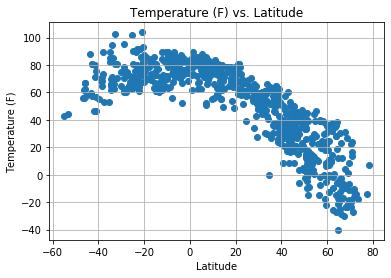

In [32]:
#* Temperature (%) vs. Latitude
plt.scatter(city_lats, temp, marker = "o")
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Temp vs Latitude.pdf")

In [33]:
#In the comparison of Temperature vs Latitude, the code is looking at where the city sits by Latitude on the globe and then looking at it's current temperature. The scatterplot looks at the correlation between distance from the equator to the current temperature.

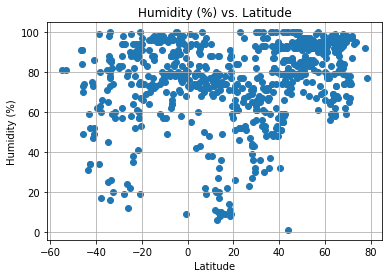

In [34]:
#* Humidity (%) vs. Latitude
plt.scatter(city_lats, humid, marker = "o")
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Humidity vs Latitude.pdf")


In [35]:
#In the comparison of Humidty % vs Latitude, the code is looking at where the city sits by Latitude on the globe and then looking at it's current humidity %. The scatterplot is showing how distance from the equator might affect the level of humidity in a certain city.

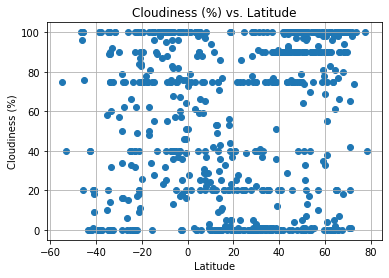

In [36]:
#* Cloudiness (%) vs. Latitude
plt.scatter(city_lats, clouds, marker = "o")
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Cloudiness vs Latitude.pdf")

In [37]:
#In the comparison of Cloudiness % vs Latitude, the code is looking at where the city sits by Latitude on the globe and then pulling it's current Cloud coverage %. The scatterplot is showing how distance from the equator might affect the cloudiness of a certain city.

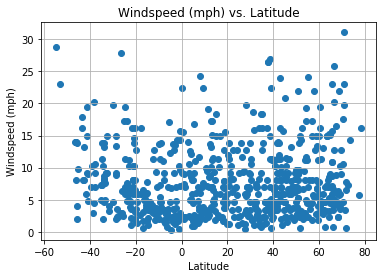

In [38]:
#* Wind Speed (mph) vs. Latitude
plt.scatter(city_lats, windspeed, marker = "o")
plt.title("Windspeed (mph) vs. Latitude")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Windspeed vs Latitude.pdf")

In [39]:
#In the comparison of Windspeed (mph) vs Latitude, the code is looking at where the city sits by Latitude on the globe and then pulling it's current wind speed. The scatterplot is showing how distance from the equator might affect windiness of a certain city.

2nd Objective - Linear Regression

In [40]:
#Your next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

#* Northern Hemisphere - Temperature (F) vs. Latitude
#* Southern Hemisphere - Temperature (F) vs. Latitude
#* Northern Hemisphere - Humidity (%) vs. Latitude
#* Southern Hemisphere - Humidity (%) vs. Latitude
#* Northern Hemisphere - Cloudiness (%) vs. Latitude
#* Southern Hemisphere - Cloudiness (%) vs. Latitude
#* Northern Hemisphere - Wind Speed (mph) vs. Latitude
#* Southern Hemisphere - Wind Speed (mph) vs. Latitude

#After each pair of plots explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have.

In [41]:
#combine all city data into one DataFrame
city_df = pd.concat([city_list_df, city_country_df, city_id_df, city_lats_df,city_long_df,temp_df,humid_df,clouds_df,windspeed_df, city_datetime_df],axis=1)

city_df.to_csv('city_summary_df.csv') 

city_df.head()

,City Name,City Country,City ID,City Lat,City Long,Temps (F),Humidity %,Cloudiness %,Windspeed (mph),City Datetime
0,hobart,AU,2163355,-42.88,147.33,80.60,34,40,8.05,1580268648
1,yulara,AU,6355222,-25.24,130.99,102.20,22,40,17.22,1580268905
2,longyearbyen,SJ,2729907,78.22,15.64,6.80,77,40,16.11,1580268882
3,vaini,TO,4032243,-21.20,-175.20,78.80,94,75,5.82,1580268862
4,krasnoselkup,RU,1502073,65.70,82.47,-5.85,97,98,10.92,1580269062


In [42]:
#determine northern and southern hemisphere cities
n_cities = []
s_cities = []

for index, row in city_df.iterrows():

    if row["City Lat"] > 0:
        n_cities.append(row)
    else:
        s_cities.append(row)

n_cities_df = pd.DataFrame(n_cities)
s_cities_df = pd.DataFrame(s_cities)


In [43]:
#Linear regression on Northern Hemisphere - Temperature (F) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(n_cities_df["City Lat"], n_cities_df["Temps (F)"])

vc_fit_ntemp = vc_slope * n_cities_df["City Lat"] + vc_int

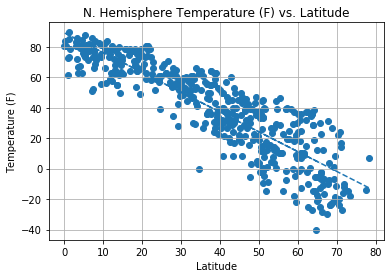

In [44]:
#* N. Hemisphere Temperature (F) vs. Latitude w linear regression
plt.scatter(n_cities_df["City Lat"], n_cities_df["Temps (F)"], marker = "o")
plt.title("N. Hemisphere Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(n_cities_df["City Lat"],vc_fit_ntemp,"--")
plt.savefig("N.Hem Temp vs Latitude.pdf")

In [45]:
#This graph shows the correlation between latitude and temperature in the northern hemisphere. There is a clear correlation that as you get further from the equator temperatures drop.

In [46]:
#Linear regression on Southern Hemisphere - Temperature (F) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(s_cities_df["City Lat"], s_cities_df["Temps (F)"])

vc_fit_stemp = vc_slope * s_cities_df["City Lat"] + vc_int

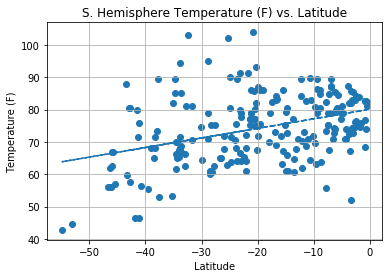

In [47]:
#* S. Hemisphere Temperature (F) vs. Latitude w linear regression
plt.scatter(s_cities_df["City Lat"], s_cities_df["Temps (F)"], marker = "o")
plt.title("S. Hemisphere Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(s_cities_df["City Lat"],vc_fit_stemp,"--")
plt.savefig("S.Hem Temp vs Latitude.pdf")

In [48]:
#This graph shows the correlation between southern hemisphere temps and latitude. The shows a pretty clear trend that as you get closer to the equator temperatures go up. The correlation might not be as clear as the northern hemisphere because it may be nighttime when this data was pulled vs daytime for

In [49]:
#Linear regression on Northern Hemisphere - Humidity (%) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(n_cities_df["City Lat"], n_cities_df["Humidity %"])

vc_fit = vc_slope * n_cities_df["City Lat"] + vc_int

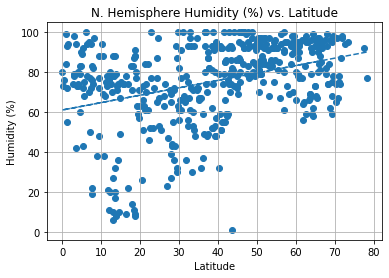

In [50]:
#* N. Hemisphere Humidity (%) vs. Latitude w linear regression
plt.scatter(n_cities_df["City Lat"], n_cities_df["Humidity %"], marker = "o")
plt.title("N. Hemisphere Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(n_cities_df["City Lat"],vc_fit,"--")
plt.savefig("N.Hem Humidity vs Latitude.pdf")

In [51]:
#Linear regression on Southern Hemisphere - Humidity (%) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(s_cities_df["City Lat"], s_cities_df["Humidity %"])

vc_fit = vc_slope * s_cities_df["City Lat"] + vc_int

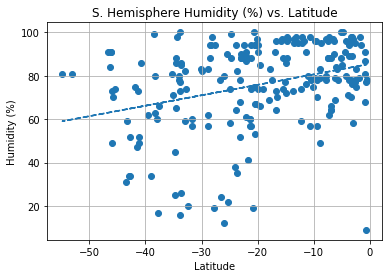

In [52]:
#* S. Hemisphere Humidity (%) vs. Latitude w linear regression
plt.scatter(s_cities_df["City Lat"], s_cities_df["Humidity %"], marker = "o")
plt.title("S. Hemisphere Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(s_cities_df["City Lat"],vc_fit,"--")
plt.savefig("S.Hem Humidity vs Latitude.pdf")

In [53]:
#Linear regression on Northern Hemisphere - Cloudiness (%) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(n_cities_df["City Lat"], n_cities_df["Cloudiness %"])

vc_fit = vc_slope * n_cities_df["City Lat"] + vc_int

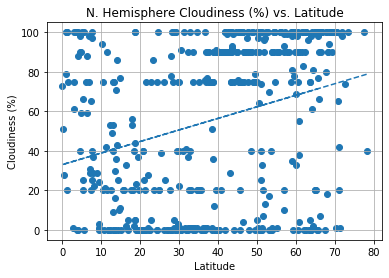

In [54]:
#* N. Hemisphere Cloudiness (%) vs. Latitude w linear regression
plt.scatter(n_cities_df["City Lat"], n_cities_df["Cloudiness %"], marker = "o")
plt.title("N. Hemisphere Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(n_cities_df["City Lat"],vc_fit,"--")
plt.savefig("N.Hem Cloudiness vs Latitude.pdf")

In [55]:
#Linear regression on Southern Hemisphere - Cloudiness (%) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(s_cities_df["City Lat"], s_cities_df["Cloudiness %"])

vc_fit = vc_slope * s_cities_df["City Lat"] + vc_int

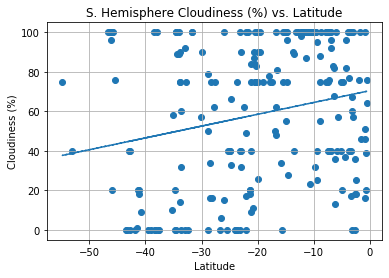

In [56]:
#* S. Hemisphere Cloudiness (%) vs. Latitude w linear regression
plt.scatter(s_cities_df["City Lat"], s_cities_df["Cloudiness %"], marker = "o")
plt.title("S. Hemisphere Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(s_cities_df["City Lat"],vc_fit,"--")
plt.savefig("S.Hem Cloudiness vs Latitude.pdf")

In [57]:
#Linear regression on Northern Hemisphere - Wind Speed (mph) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(n_cities_df["City Lat"], n_cities_df["Windspeed (mph)"])

vc_fit = vc_slope * n_cities_df["City Lat"] + vc_int

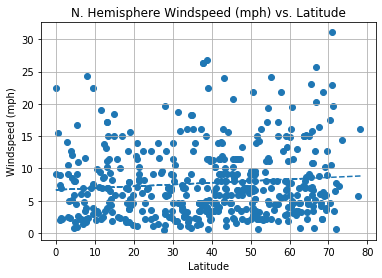

In [58]:
#* N. Hemisphere Windspeed (mph) vs. Latitude w linear regression
plt.scatter(n_cities_df["City Lat"], n_cities_df["Windspeed (mph)"], marker = "o")
plt.title("N. Hemisphere Windspeed (mph) vs. Latitude")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(n_cities_df["City Lat"],vc_fit,"--")
plt.savefig("N.Hem Windspeed vs Latitude.pdf")

In [59]:
#Linear regression on Southern Hemisphere - Wind Speed (mph) vs. Latitude
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(s_cities_df["City Lat"], s_cities_df["Windspeed (mph)"])

vc_fit = vc_slope * s_cities_df["City Lat"] + vc_int

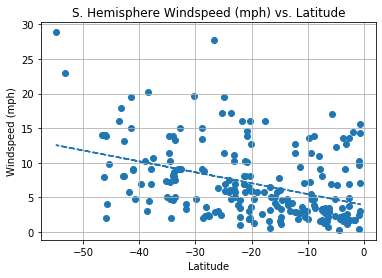

In [60]:
#* S. Hemisphere Windspeed (mph) vs. Latitude w linear regression
plt.scatter(s_cities_df["City Lat"], s_cities_df["Windspeed (mph)"], marker = "o")
plt.title("S. Hemisphere Windspeed (mph) vs. Latitude")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(s_cities_df["City Lat"],vc_fit,"--")
plt.savefig("S.Hem Windspeed vs Latitude.pdf")

In [61]:
#Your final notebook must:

#* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
#* Perform a weather check on each of the cities using a series of successive API calls.
#* Include a print log of each city as it's being processed with the city number and city name.
#* Save a CSV of all retrieved data and a PNG image for each scatter plot.
